# Лабораторная работа №2.1 "Опыт Франка-Герца"

<center>
    Методом электронного возбуждения измеряется энергия первого уровня атома гелия в динамическом и статистическом режиме.
</center>

### Динамический режим

По пикам определим энергию:

In [134]:
# [4 В, 6 В, 8 В]
E_max = {'up': [16, 15.5, 15], 'down': [17, 15.75, 15.9]}
E_min = {'up': [16, 16.25, 17], 'down': [17.25, 17.25, 19.5]}

In [135]:
def get_mean_E(E_max, E_min):
    import numpy as np
    return np.mean(np.concatenate((E_max['up'], E_max['down'], E_min['up'], E_max['down'])))

In [136]:
E_expected = get_mean_E(E_max, E_min)
E_expected

16.087500000000002

Итак, мы ожидаем энергию $E = 16.09$ эВ.

## Статический режим

Считаем данные

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('vah_static.csv', delimiter=';', dtype=np.float)

In [139]:
df.head()

,V_0,V,I
0,4.0,0.00,1.0
1,4.0,2.19,6.0
2,4.0,4.82,12.0
3,4.0,6.67,17.0
4,4.0,7.93,21.0


##### 4 вольта

In [140]:
x, y = df.V[df.V_0 == 4], \
        df.I[df.V_0 == 4]*5 # 1 деление прибора было 5 мА
# Сортируем
y = y[x.argsort()]
x = np.sort(x)

In [141]:
def paint_dots(*args):
    fig, ax = plt.subplots()
    for i in args:
        x_data, y_data, is_scatter, label = i['x'], i['y'], i['isScatter'], i['label']
        if is_scatter:
            ax.scatter(x_data, y_data, label=label)
        else:
            ax.plot(x_data, y_data, label=label)
    ax.grid()

    ax.set_xlabel(r'$V$, В')
    ax.set_ylabel(r'$I$, мА')
    ax.legend()
    ax.set_title('ВАХ')
    
    fig.savefig('out1.pdf')

In [142]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)
cs_deriv_roots = cs.derivative().roots()

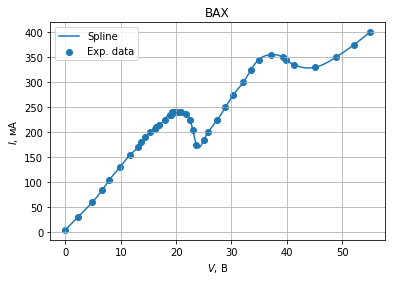

In [158]:
x_spline = np.linspace(x[0], x[-1], 1000)
paint_dots(
    {'x': x, 'y': y, 'isScatter': True, 'label': r'Exp. data'}, 
    {'x': x_spline, 'y': cs(x_spline), 'isScatter': False, 'label': r'Spline'},
)

Экстремумы (и шумы, кажущиеся экстремумами) приходятся на точки

In [159]:
print(cs_deriv_roots)

[18.71232306 18.93502767 19.41592136 19.9718728  20.50574638 24.06421498
 37.59476139 43.91248945]


Разность между минимумами дает:

In [160]:
E_by_min = 43.912 - 24.064
E_by_min

19.848

Разность между максимумами дает:

In [168]:
E_by_max = 37.595 - 19.41
E_by_max

18.185

Среднее между разностями:

In [169]:
E_mean = 0.5*(E_by_max + E_by_min)
E_mean

19.0165

Оценим погрешности:

In [170]:
d_E_mean = np.sqrt((E_mean - E_by_min)**2 + (E_mean - E_by_min)**2)
d_E_mean

1.1759185771132261

Оценка относительной статистической погрешности:

In [171]:
print(r'  E = ({0:.2f} ± {1:.2f}) эВ'.format(E_mean, float(d_E_mean)))

  E = (19.02 ± 1.18) эВ


Итак, энергия возбуждения составила $E = (19.02 \pm 1.18)$ эВ

In [172]:
print('  ∆E/E = {0:.2f}%'.format(d_E_mean/E_mean*100))

  ∆E/E = 6.18%


Погрешности приборов были порядка 1%, поэтому их можно не учесть в конеченой оценке погрешности.

Итоговая погрешность двух измерений будет 

In [174]:
print('  Относительная погрешность в результатах, полученных двумя способами, в процентах: {0:.2f}%'.format((E_mean - E_expected) / E_mean * 100))

  Относительная погрешность в результатах, полученных двумя способами, в процентах: 15.40%


## Выводы

<ol>
    <li> Убедились в дискретности спектра гелия </li>
    <li> Уведели отклонение поведения ВАХ от классической модели </li>
    <li> Определили энергию возбуждения атома гелия </li>
</ol>